In [1]:
import cv2 # import opencv


In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file) # after dnn press tab this will give you options to comands

In [5]:
classLabels = [] # empty list of python
file_name = 'coco_labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)
print("the number of classes are", len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
the number of classes are 80


In [7]:
model.setInputSize(320,320) # as model is 320x320 in configuration file
model.setInputScale(1.0/127.5) ## 355/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet takes input as [-1,1]
model.setInputSwapRB(True) # so automatic conversion from BGR (OpenCV default) to RGB

<dnn_Model 0000024F3B9D7770>

# read an image

In [8]:
img = cv2.imread('man with car.jpg')

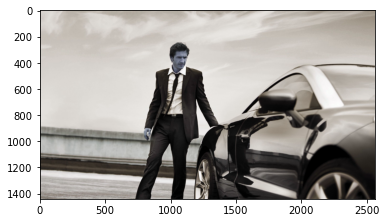

In [9]:
plt.imshow(img) # BGR image

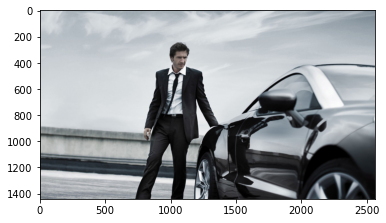

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex,confidence, bbox = model.detect(img,confThreshold = 0.5) # as model is already loaded, and it has 3 outputs
# since confidence level taken by us is 50% so 0.5, this parameter can be changed

In [12]:
print("The classes identified are",ClassIndex)

The classes identified are [[3]
 [1]]


In [13]:
font_scale = 10
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf,boxes in zip (ClassIndex.flatten(), confidence.flatten(),bbox): # zip is used as 3 diff variables
    # cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) # frame is image file name, rest two are coordinates, and then color (blue) and width or box line
    # cv2.putText(img,text,(text_offset_x,Text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness = 1)
    # the text in ClassLabels will be written in the box, and index is reduced by -1 as python start as zero index
    cv2.rectangle(img,boxes,(255,0,0),2) # rectangle is box
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font , fontScale = font_scale,color = (255,0,0),thickness=3)


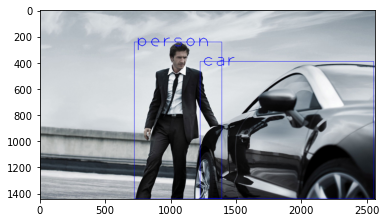

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [15]:
## Video demo

In [16]:
cap = cv2.VideoCapture("London walk.mp4")



#check if video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open Video")
        

font_scale = 20
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex,confidence,bbox = model.detect(frame,confThreshold = 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf,boxes in zip (ClassIndex.flatten(), confidence.flatten(),bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+1,boxes[1]+4), font , fontScale = font_scale,color = (0,255,0),thickness=3)
                
    
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF ==('q'):
        break
        

cap.release()
cv2.destroyAllWindows

()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[1]]
()
()
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
()
[[1]]
[[1]]
()
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [8]]
[[1]]
[[1]]
[[1]]
[[1]]
()
[[1]]
()
()
()
[[1]]
[[1]]
()
[[1]]
()
[[8]]
[[1]
 [1]
 [1]
 [8]]
[[1]
 [8]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]
 [8]]
[[1]
 [1]
 [8]]
[[1]
 [8]]
[[1]
 [8]]
[[1]
 [8]]
[[1]
 [1]
 [8]]
[[1]
 [6]
 [8]]
[[1]
 [8]]
[[8]
 [1]
 [1]]
[[1]
 [8]
 [1]]
[[8]
 [1]
 [1]
 [1]]
[[1]
 [8]
 [1]
 [1]]
[[1]
 [8]
 [1]
 [1]]
[[1]
 [1]
 [8]
 [1]]
[[1]
 [1]
 [8]
 [1]]
[[1]
 [1]
 [8]
 [1]]
[[1]
 [1]
 [8]]
[[1]
 [8

[[6]
 [1]
 [1]
 [8]
 [3]
 [1]
 [1]
 [3]
 [7]
 [6]]
[[6]
 [1]
 [1]
 [8]
 [3]
 [7]
 [3]
 [1]]
[[1]
 [6]
 [1]
 [8]
 [3]
 [3]
 [7]]
[[1]
 [6]
 [1]
 [8]
 [3]
 [1]
 [3]
 [7]
 [1]
 [3]]
[[1]
 [6]
 [1]
 [8]
 [3]
 [7]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [8]
 [3]
 [1]
 [7]
 [1]
 [3]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [8]
 [3]
 [7]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [1]
 [8]
 [7]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [8]
 [1]
 [1]
 [7]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[6]
 [1]
 [1]
 [3]
 [1]
 [1]
 [8]
 [7]
 [3]
 [1]
 [1]
 [3]]
[[6]
 [1]
 [1]
 [3]
 [7]
 [8]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [6]
 [1]
 [1]
 [8]
 [3]
 [1]
 [7]
 [3]
 [1]]
[[1]
 [1]
 [6]
 [8]
 [1]
 [1]
 [3]
 [3]
 [1]
 [7]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [8]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [8]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [8]
 [1]
 [3]
 [1]
 [7]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [8]
 [7]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [1]
 [8]
 [1]
 [7]
 [1]
 [3]]
[[1]
 [6]
 [1]
 [7]
 [8]
 [1]
 [1]
 [1]
 [3]
 [

[[6]
 [1]
 [1]
 [3]
 [6]
 [6]
 [3]
 [6]
 [1]
 [3]
 [3]
 [1]]
[[6]
 [1]
 [1]
 [3]
 [6]
 [3]
 [6]
 [3]
 [1]
 [1]
 [3]
 [6]
 [3]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [3]
 [1]
 [6]
 [6]
 [3]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [6]
 [1]
 [1]
 [3]
 [6]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[6]
 [1]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [6]
 [6]
 [3]]
[[6]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [6]
 [6]]
[[1]
 [6]
 [1]
 [3]
 [3]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [1]
 [1]
 [6]
 [3]
 [6]]
[[1]
 [6]
 [1]
 [1]
 [3]
 [3]
 [6]
 [1]
 [6]]
[[1]
 [6]
 [1]
 [1]
 [3]
 [3]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [6]
 [1]
 [3]
 [6]
 [1]
 [6]]
[[1]
 [6]
 [1]
 [3]
 [6]
 [1]
 [3]
 [6]
 [1]
 [6]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [3]
 [3]
 [1]
 [1]
 [6]
 [6]
 [6]]
[[1]
 [6]
 [1]
 [3]
 [6]
 [3]
 [1]
 [1]
 [1]
 [3]
 [6]
 [6]]
[[1]
 [6]
 [1]
 [6]
 [3]
 [1]
 [3]
 [6]
 [6]
 [1]
 [3]
 [1]]
[[1]
 [6]
 [3]
 [1]
 [6]
 [3]
 [6]
 [3]
 [1]
 [6]
 [6]]
[[1]
 [6]
 [1]
 [3]
 [3]
 [6]
 [3]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [3]
 [6]
 [3]
 [1]
 [3]
 [1]]
[[6]
 [

[[1]
 [6]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [6]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]]
[[1]
 [6]
 [6]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [6]]
[[1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [6]
 [6]
 [1

[[ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 1]
 [31]
 [ 1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [31]
 [ 1]]
[[1]
 [1]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 6]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 6]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [6]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [31]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [1]
 [6

[[3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]
 [1]]
[[3]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [6]
 [1]
 [1]
 [1]]
[[3]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [6]
 [1]
 [1]]
[[3]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [6]
 [1]
 [1]]
[[3]
 [6]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [6]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [6]]
[[3]
 [1]
 [1]
 [6]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [3]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [3]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [3]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [1]
 [3]]

[[6]
 [1]
 [3]]
[[6]
 [1]
 [3]]
[[6]
 [1]
 [3]]
[[1]
 [6]
 [3]
 [1]
 [1]]
[[6]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]]
[[6]
 [1]
 [1]]
[[6]
 [1]
 [1]]
[[6]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]]
[[1]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [1]
 [6]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [6]]
[[1]
 [6]]
[[1]
 [6]]
[[1]]
[[1]
 [6]]
[[1]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [1]
 [6]]
[[1]
 [6]]

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [77]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [

[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [10]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]
 [10]
 [27]
 [ 1]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [27]
 [31]
 [31]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [10]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [27]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [10]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [10]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [27]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [27]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [27]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [10]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]

[[ 1]
 [ 1]
 [ 1]
 [10]
 [31]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [10]
 [31]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [31]
 [31]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [10]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [10]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [10]
 [31]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [10]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [31]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [31]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]
 [31]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [ 1

[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [31]
 [27]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [31]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [31]
 [31]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [27]
 [31]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [31]
 [27]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [31]
 [ 1]
 [31]
 [27]]
[[ 1]
 [ 6]
 [ 1]
 [27]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [27]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 6]
 [ 1]
 [27]
 [ 1]
 [31]]
[[ 1]
 [ 6]
 [ 1]
 [ 1]
 [27]
 [31]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [31]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [27]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [31]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [27]
 [31]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [31]
 [31]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [27]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]]
[[ 6]
 [ 1]
 [ 1]
 [27]
 [31]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [31]]
[[ 6]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [27]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [31]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]]
[[ 1]
 [ 6]
 [ 1]
 [27

[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 6]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [10]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[1]
 [1]
 [6]
 [1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [1]
 [1]
 [6]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[1]
 [1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [10]]
[[ 6]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 6]
 [ 1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [10]
 [ 6]
 [ 1]
 [ 1]
 [ 1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]
 [1]
 [1]
 [6]]
[[ 6]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [6]
 [1]
 [6]
 [1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [ 6]
 [ 1]
 [ 1]
 [ 1]
 [

[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [27]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [10]
 [27]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 3]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [10]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [10]
 [31]
 [31]]
[[ 1]
 [31]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [31]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [31]
 [31]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [10]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [31]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [10]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [31]
 [ 1]
 [10]
 [31]
 [ 1]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [31]
 [10]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [31]
 [ 1]
 [10]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]

[[1]
 [1]
 [1]
 [2]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 3]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 2]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [2]
 [1]
 [1]
 [8]]
[[1]
 [1]
 [1]
 [2]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [10]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 2]
 [31]]
[[1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [3]
 [2]
 [1]
 [8]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]]
[[ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 8]
 [31]
 [ 1

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [33]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [

[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]

KeyboardInterrupt: 